# <p style='text-align: center;'> Exercise 4 </p>


# <p style='text-align: center;'> Md.Abdullah-Al Mamun </p>

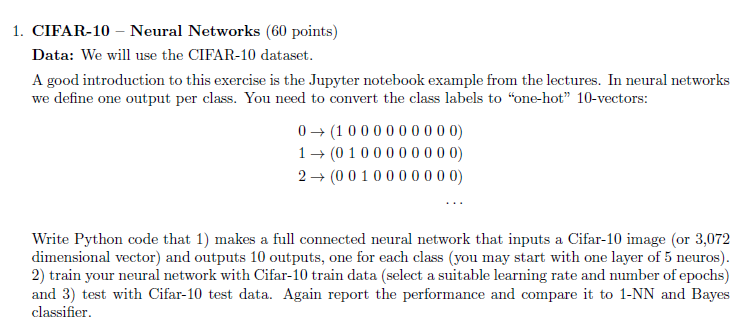

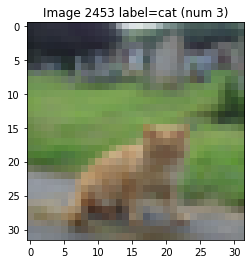

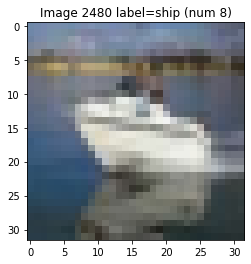

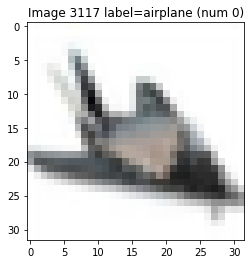

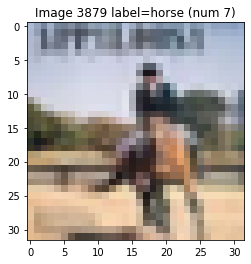

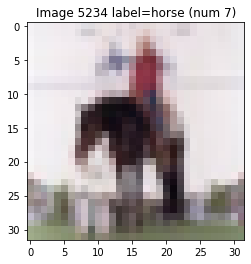

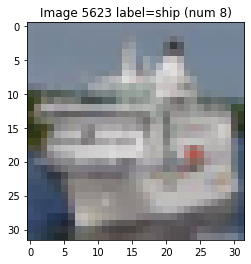

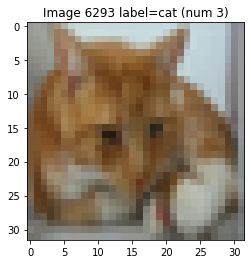

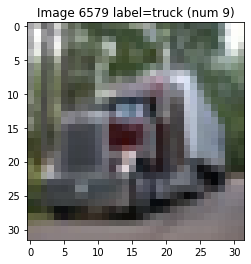

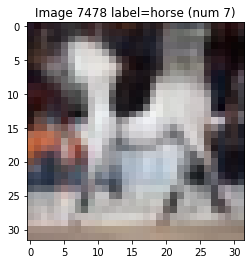

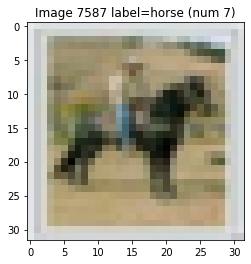

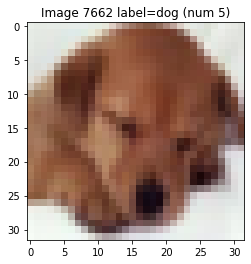

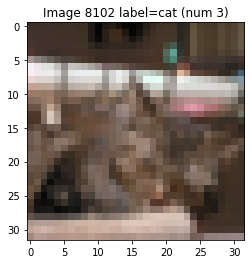

In [40]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from random import random

def unpickle(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding="latin1")
    return dict

#datadict = unpickle('/home/kamarain/Data/cifar-10-batches-py/data_batch_1')
datadict = unpickle('test_batch')

X = datadict["data"]
Y = datadict["labels"]

labeldict = unpickle('batches.meta')
label_names = labeldict["label_names"]

X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)

for i in range(X.shape[0]):
    # Show some images randomly
    if random() > 0.999:
        plt.figure(1);
        plt.clf()
        plt.imshow(X[i])
        plt.title(f"Image {i} label={label_names[Y[i]]} (num {Y[i]})")
        plt.pause(1)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from sklearn.metrics import accuracy_score
from keras.utils import np_utils

# loading dataset
(training_X, train_Y), (testing_X, testing_Y) = cifar10.load_data()

In [4]:
#Normalization
training_X = training_X.astype('float32')/255
testing_X = testing_X.astype('float32')/255

In [5]:
#Hot encoding
train_Y = np_utils.to_categorical(train_Y)
testing_Y = np_utils.to_categorical(testing_Y)

In [6]:
cnn_model = Sequential()

# Adding layers

cnn_model.add(Conv2D(32 , (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(32 , (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))

In [7]:
# The model compilation
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#data augmentation
aug_data = ImageDataGenerator(zoom_range=0.2, horizontal_flip=True)
steps = int(training_X.shape[0]/64)
cnn_summery = cnn_model.fit_generator(aug_data.flow(training_X, train_Y, batch_size=64), steps_per_epoch=steps, epochs=40, validation_data=(testing_X, testing_Y))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
781/781 [==============================] - 214s 274ms/step - loss: 1.7409 - accuracy: 0.4022 - val_loss: 1.3680 - val_accuracy: 0.5041
Epoch 2/40
781/781 [==============================] - 214s 274ms/step - loss: 1.2233 - accuracy: 0.5631 - val_loss: 1.1874 - val_accuracy: 0.5920
Epoch 3/40
781/781 [==============================] - 213s 273ms/step - loss: 1.0486 - accuracy: 0.6300 - val_loss: 1.1039 - val_accuracy: 0.6253
Epoch 4/40
781/781 [==============================] - 218s 279ms/step - loss: 0.9394 - accuracy: 0.6720 - val_loss: 0.9009 - val_accuracy: 0.6924
Epoch 5/40
781/781 [==============================] - 214s 274ms/step - loss: 0.8608 - accuracy: 0.7003 - val_loss: 0.8352 - val_accuracy: 0.7148
Epoch 6/40
781/781 [==============================] - 218s 279ms/step - loss: 0.8071 - accuracy: 0.7223 - val_loss: 0.6872 - val_accuracy: 0.7643
Epoch 7/40
781/781 [============================

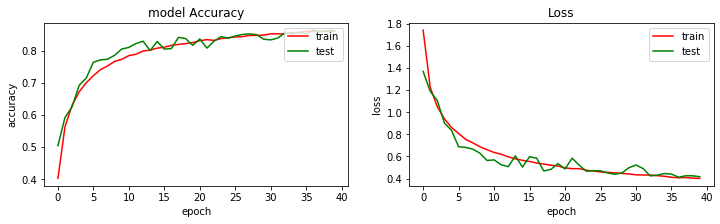

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12,3))

axes[0].set_title('model Accuracy')
axes[0].plot(cnn_summery.history['accuracy'], color='red')
axes[0].plot(cnn_summery.history['val_accuracy'], color='green')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('accuracy')
axes[0].legend(['train', 'test'], loc='upper right')


axes[1].set_title('Loss')
axes[1].plot(cnn_summery.history['loss'], color='red')
axes[1].plot(cnn_summery.history['val_loss'], color='green')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('loss')
axes[1].legend(['train', 'test'], loc='upper right')


In [ ]:
predY = cnn_model.predict(testing_X)
predictY = np.argmax(predY, axis=1)
test_Y = np.argmax(testing_Y, axis=1)

ac_score=accuracy_score(test_Y, predictY)*100
print('The model accuracy is: {:.0f} %'.format(ac_score))

The model accuracy is:  86 %

#### Accuracy of CNN (convolutional neural network) is approximately 85 % . 1-NN and Bayes classifiers have less accuracy than the CNN.